# Predictive Analysis to determine the most likely potential future customers

## Objective:
To predict the most likely potential future customers to focus on, thus improving and sales efforts, lowering costs, and increase success.
<br>Springboard Capstone Project
<br>Matthew Walker
<br>22 Sept 2018

Location of data: 
<br>https://openei.org/doe-opendata/dataset/understanding-the-evolution-of-customer-motivations-and-adoption-barriers-in-residential-solar-mar71 

In [86]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
import scipy.stats as stats
from scipy.stats import spearmanr

## A brief description of the data:
I found this data on the OpenEI.org website.  It contains data from a survey taken by individuals within one of three
groups: 'Adopters'-those who have already purchased a solar panel array system, 'Considerers'-those actively considering
purchasing a system, but do not currently own one, and 'GPS' group of people that have not yet even considered purchasing
a system.

My objective is to see if a pattern can be discovered in the Adopter group that may indicate individuals in the other
two groups as potential future purchasers of solar array systems.

My target audience would be solar array companies, looking to save effort and money in aquiring new customers.

In [2]:
#bring in the datasets for adopter (has solar), considerer(thought about buying), and gps(have not thought of 
adopter= pd.read_csv('C:/Users/Matt/Desktop/datasets/ADOPTER.csv')
considerer = pd.read_csv('C:/Users/Matt/Desktop/datasets/CONSIDERER.csv')
gps= pd.read_csv('C:/Users/Matt/Desktop/datasets/GPS.csv')

In [3]:
considerer.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,HAVESOLAR,CONSIDEREDSOLAR,CONSIDER_SERIOUSLY,CONSIDER_ACTN1,CONSIDER_ACTN2,...,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,RETIRED_LAST5YRS,RETIRE_WHEN,RETIRE_WHEN_BINNED
0,2946,2,4,2,NaN,2,1,3,1,0,...,1,1,1.0,3,3,4,0,NaN,1.0,6.0
1,2947,2,4,3,NaN,2,1,2,1,1,...,1,0,2.0,2,1,4,0,NaN,1.0,5.0
2,2948,2,4,4,NaN,2,1,3,1,0,...,0,1,4.0,4,1,3,0,NaN,2.0,NaN
3,2949,2,4,4,NaN,2,1,3,1,1,...,0,0,3.0,1,2,4,1,0.0,NaN,NaN
4,2950,2,4,2,NaN,2,1,2,0,0,...,0,0,4.0,3,1,2,1,0.0,NaN,NaN


In [4]:
considerer.shape

(588, 201)

In [5]:
adopter.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,HOME,HAVESOLAR,PROMPT1,PROMPT2,PROMPT3,PROMPT4,...,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,RETIRED_LAST5YRS,RETIRE_WHEN,RETIRE_WHEN_BINNED
0,1342,3,2,4,NaN,1,0,0,1,0,...,0.0,0.0,4.0,4.0,2,5.0,1,1.0,NaN,NaN
1,1343,3,2,4,NaN,1,1,0,1,0,...,0.0,0.0,4.0,2.0,1,4.0,0,NaN,98.0,NaN
2,1344,3,2,4,NaN,1,0,0,0,0,...,99.0,99.0,NaN,99.0,99,99.0,99,NaN,NaN,NaN
3,1345,3,2,4,NaN,1,0,0,1,0,...,1.0,0.0,2.0,2.0,2,3.0,0,NaN,98.0,NaN
4,1346,3,2,4,NaN,1,0,0,1,0,...,0.0,1.0,2.0,2.0,2,1.0,0,NaN,98.0,NaN


In [6]:
adopter.shape

(1604, 255)

In [7]:
gps.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,HOME,STATE,AGE_BINNED,EDUC_BINNED,F1,F2,TRIG1,...,SQFT_BINNED,GENDER,PEOPLE_TOT_3PLUS,HAVE_KIDS,EMPLOY_1,EMPLOY_2,EMPLOY_5,RETIRED,FINANCIAL,INCOME_BINNED
0,1,1,1,1,1,4.0,4,1,0,0,...,3,0,0.0,0,0,0,0,1,2,3
1,2,1,1,1,4,3.0,4,1,1,0,...,3,1,0.0,0,1,0,0,0,2,4
2,3,1,1,1,2,4.0,1,1,1,0,...,4,0,0.0,0,0,0,0,1,1,95
3,4,1,1,1,4,4.0,2,0,1,1,...,2,0,0.0,0,0,0,0,1,1,4
4,5,1,1,1,4,4.0,1,0,1,1,...,3,0,0.0,0,0,0,0,1,2,3


In [8]:
gps.shape

(1341, 123)

Each dataset has a different number of columns. I need to find out which columsn they all have in common, so as
to compare them.

In [9]:
#find out how many columns are in all datasets (adopter, considerer and gps)
c_index = considerer.columns
a_index = adopter.columns
a_c_cols = c_index.intersection(a_index)

In [10]:
#columns in common in a and c datasets
a_c_cols

Index(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE', 'HOME',
       'HAVESOLAR', 'PROMPT1', 'PROMPT2', 'PROMPT3', 'PROMPT4',
       ...
       'HAVE_KIDS', 'GENDER', 'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL',
       'INCOME_BINNED', 'RETIRED', 'RETIRED_LAST5YRS', 'RETIRE_WHEN',
       'RETIRE_WHEN_BINNED'],
      dtype='object', length=142)

In [11]:
#do the same for the gps dataset
g_index = gps.columns
a_c_g_cols = a_c_cols.intersection(g_index)

In [12]:
#columns in common in all three datasets
a_c_g_cols

Index(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE', 'HOME',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3', 'E2',
       'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1', 'VB2', 'VB3',
       'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1', 'VE2', 'VE4', 'VO1',
       'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3', 'CNS1', 'CNS2', 'CNS4',
       'SQFT_BINNED', 'STANCE', 'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER',
       'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED'],
      dtype='object')

In [13]:
#how many features are in all three datasets
a_c_g_cols.value_counts().sum() 

49

In [14]:
#create new datasets with dropped columns, so only comparable columns exist
a_comparable = adopter[a_c_g_cols] #should now contain only relatable columns, repeat for c and c datasets
c_comparable = considerer[a_c_g_cols]
g_comparable = gps[a_c_g_cols]

a_c_g_cols_ar = np.array(a_c_g_cols)
a_c_g_cols_ar #may not need this, but found it difficult to work with an index object...

array(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE', 'HOME',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3',
       'E2', 'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1',
       'VB2', 'VB3', 'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1',
       'VE2', 'VE4', 'VO1', 'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3',
       'CNS1', 'CNS2', 'CNS4', 'SQFT_BINNED', 'STANCE',
       'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER', 'AGE_BINNED',
       'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED'],
      dtype=object)

#### Investigation into the amount of data missing within the comparable features:

In [15]:
#calculate the percent of missing data:
#set option to consider inf as missing data:
pd.options.mode.use_inf_as_na = True
a_comp_nulls = a_comparable.isnull().sum()/len(a_comparable)*100
a_comp_nulls = a_comp_nulls[a_comp_nulls !=0] #remove the features that are not missing data
print("Percent missing data:")
print(a_comp_nulls)

Percent missing data:
HOME                  95.324190
WINTER_NOPV_BINNED     8.291771
SUMMER_NOPV_BINNED     9.102244
SQFT_BINNED           11.221945
PEOPLE_TOT_3PLUS       8.728180
HAVE_KIDS              0.187032
GENDER                 0.561097
AGE_BINNED             7.356608
EDUC_BINNED            9.289277
INCOME_BINNED          3.366584
dtype: float64


In [16]:
#drop the HOME column
a_comparable = a_comparable.drop('HOME', axis=1)

In [17]:
#calculate the percent of missing data:
a_comp_nulls_count = a_comparable.isnull().sum()
a_comp_nulls_count = a_comp_nulls_count[a_comp_nulls_count !=0] #remove the features that are not missing data
print("Count of missing data:")
print(a_comp_nulls_count)

Count of missing data:
WINTER_NOPV_BINNED    133
SUMMER_NOPV_BINNED    146
SQFT_BINNED           180
PEOPLE_TOT_3PLUS      140
HAVE_KIDS               3
GENDER                  9
AGE_BINNED            118
EDUC_BINNED           149
INCOME_BINNED          54
dtype: int64


In [18]:
#find winter mean
a_winter_mean = a_comparable.WINTER_NOPV_BINNED.mean()
#fill in missing data with mean
a_comparable.WINTER_NOPV_BINNED.fillna(a_winter_mean, inplace=True)
#get a count (to see if fill worked)
a_comparable['WINTER_NOPV_BINNED'].isnull().sum()

0

In [19]:
#do this for summer feature as well
#find summer mean
a_summer_mean = a_comparable.SUMMER_NOPV_BINNED.mean()
#fill in missing data with mean
a_comparable.SUMMER_NOPV_BINNED.fillna(a_summer_mean, inplace=True)
#get a count (to see if fill worked)
a_comparable['SUMMER_NOPV_BINNED'].isnull().sum()

0

In [20]:
#and for SQFT
#find SQFT mean
a_SQFT_mean = a_comparable.SQFT_BINNED.mean()
#fill in missing data with mean
a_comparable.SQFT_BINNED.fillna(a_SQFT_mean, inplace=True)
#get a count (to see if fill worked)
a_comparable['SQFT_BINNED'].isnull().sum()

0

In [21]:
#how does gender counts look
a_comparable.groupby('GENDER').nunique()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
GENDER,,,,,,,,,,,,,,,,,,,,,
0.0,1009,1,2,4,12,12,7,7,7,7,...,5,8,2,3,1,4,5,5,7,3
1.0,553,1,2,4,12,12,7,7,7,7,...,5,8,2,3,1,4,5,5,7,3
99.0,33,1,2,4,9,9,6,7,6,6,...,5,5,2,3,1,4,4,3,7,3


In [22]:
#can just set the 9 nulls to 0.0
a_comparable['GENDER'].fillna(0.0, inplace=True)
a_comparable['GENDER'].isnull().sum()

0

In [23]:
#how does 'HAVE_KIDS' counts look
a_comparable.groupby('HAVE_KIDS').nunique()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
HAVE_KIDS,,,,,,,,,,,,,,,,,,,,,
0.0,1027,1,2,4,12,12,7,7,7,7,...,5,8,2,1,3,4,5,5,7,3
1.0,447,1,2,4,12,12,6,7,6,6,...,5,8,2,1,3,4,5,5,7,3
99.0,127,1,2,4,12,12,7,7,7,7,...,5,8,0,1,3,4,5,5,7,3


In [24]:
#can just set the 3 nulls to 0.0
a_comparable['HAVE_KIDS'].fillna(0.0, inplace=True)
a_comparable['HAVE_KIDS'].isnull().sum()

0

In [25]:
#Look at PEOPLE_TOT_3PLUS feature
#how does 'HAVE_KIDS' counts look
a_comparable.groupby('PEOPLE_TOT_3PLUS').count()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,CNS4,SQFT_BINNED,STANCE,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
PEOPLE_TOT_3PLUS,,,,,,,,,,,,,,,,,,,,,
0.0,746,746,746,746,746,746,746,746,746,746,...,746,746,746,746,746,703,667,746,725,746
1.0,718,718,718,718,718,718,718,718,718,718,...,718,718,718,718,718,673,656,718,692,718


In [26]:
#can just set the 140 nulls to either value, randomly, but using forward fill
a_comparable['PEOPLE_TOT_3PLUS'].fillna(method='ffill', inplace=True)
a_comparable['PEOPLE_TOT_3PLUS'].isnull().sum()

0

In [27]:
#Now look at PEOPLE_TOT_3PLUS feature to see if ffill filled nulls aprox. equally(orig count: 0.0-746, 1.0-718)
#how does 'HAVE_KIDS' counts look
a_comparable.groupby('PEOPLE_TOT_3PLUS').count()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,CNS4,SQFT_BINNED,STANCE,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
PEOPLE_TOT_3PLUS,,,,,,,,,,,,,,,,,,,,,
0.0,811,811,811,811,811,811,811,811,811,811,...,811,811,811,811,811,757,728,811,785,811
1.0,793,793,793,793,793,793,793,793,793,793,...,793,793,793,793,793,729,727,793,765,793


In [28]:
#counts now 0.0-811(65 more), 1.0-793(75 more), pretty even!

#Look at AGE_BINNED feature
#how does 'AGE_BINNED' counts look
a_comparable.groupby('AGE_BINNED').count()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,CNS4,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
AGE_BINNED,,,,,,,,,,,,,,,,,,,,,
1.0,244,244,244,244,244,244,244,244,244,244,...,244,244,244,244,244,244,213,244,241,244
2.0,323,323,323,323,323,323,323,323,323,323,...,323,323,323,323,323,323,296,323,306,323
3.0,455,455,455,455,455,455,455,455,455,455,...,455,455,455,455,455,455,409,455,439,455
4.0,464,464,464,464,464,464,464,464,464,464,...,464,464,464,464,464,464,422,464,446,464


In [29]:
#largest group is 4.0, and there are 118 nulls...
#could fill nulls as before, randomly like with PEOPLE_TOT_3PLUS
a_comparable['AGE_BINNED'].fillna(method='ffill', inplace=True)
a_comparable['AGE_BINNED'].isnull().sum()

0

In [78]:
#how to handle the last two features: Education and income?
#let's look at the distribution
a_comparable.groupby('EDUC_BINNED').count()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,CNS4,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
EDUC_BINNED,,,,,,,,,,,,,,,,,,,,,
1.0,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,100,104
2.0,502,502,502,502,502,502,502,502,502,502,...,502,502,502,502,502,502,502,502,479,502
3.0,444,444,444,444,444,444,444,444,444,444,...,444,444,444,444,444,444,444,444,429,444
4.0,377,377,377,377,377,377,377,377,377,377,...,377,377,377,377,377,377,377,377,366,377
99.0,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,27,28


In [79]:
#and income:
a_comparable.groupby('INCOME_BINNED').count()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,CNS4,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,RETIRED
INCOME_BINNED,,,,,,,,,,,,,,,,,,,,,
1.0,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,121,132,132
2.0,224,224,224,224,224,224,224,224,224,224,...,224,224,224,224,224,224,224,211,224,224
3.0,208,208,208,208,208,208,208,208,208,208,...,208,208,208,208,208,208,208,187,208,208
4.0,359,359,359,359,359,359,359,359,359,359,...,359,359,359,359,359,359,359,320,359,359
5.0,289,289,289,289,289,289,289,289,289,289,...,289,289,289,289,289,289,289,257,289,289
95.0,266,266,266,266,266,266,266,266,266,266,...,266,266,266,266,266,266,266,236,266,266
99.0,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,69,72,72


In [80]:
#for now, let's ffill them both, just to clear missing  data, and run some inferential stats
#we may need to revert all this if this is not the best way, or just to see if there are differences

#Education
a_comparable['EDUC_BINNED'].fillna(method='ffill', inplace=True)
a_comparable['EDUC_BINNED'].isnull().sum()

#Income
a_comparable['INCOME_BINNED'].fillna(method='ffill', inplace=True)
a_comparable['INCOME_BINNED'].isnull().sum()

0

In [81]:
#Finally, re-calculate the percent of missing data:
a_comp_nulls_count = a_comparable.isnull().sum()
a_comp_nulls_count = a_comp_nulls_count[a_comp_nulls_count !=0] #remove the features that are not missing data
print("Count of missing data:")
print(a_comp_nulls_count)

Count of missing data:
Series([], dtype: int64)


#### Adopters missing some key data:
-  'Home'-remove since so much is missing
-  'Winter/Summer bills w/o PV'-may be able to fill with median???
-  'SQFT'-fill with median?
-  'People-total >=3'-not sure what to do...
-  'Have Kids/Gender'-very low, see how many records (does not show missing in other datasets)
-  'age'-shows up in other datasets too, need to determine what to do with this, seems important?
-  'education'-seems important to target, not showing in other datasets
-  'income'-same as education

In [31]:
#looking to see if the missing data resides in just a few records missing most data (easier to just
#delete those few records), or is spread around (would require imputation)
#not sure if this is useful or working...
cols = ['WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'SQFT_BINNED', 'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER', 'AGE_BINNED', 'EDUC_BINNED', 'INCOME_BINNED']
def find_multinulls(df):
    col_count = {}
    for index, row in df.iterrows():
        count = 0
        for col in cols:
            if row[col] is None or row[col]== np.NaN:
                count += 1
                col_count[row.CASE_ID] = count
    return col_count

a_comp_multinulls = find_multinulls(a_comparable)
#a_comp_multinulls
#a_comparable.loc[1342.0]

#### Now that there are no missing data in A group,let's try and run some inferential stats

In [ ]:
#Spearman correlation?
#Pearsons correlation?
#Chi^2?

#### Let's clean up the missing data in both C and G groups in the same was as was done for the A group.

In [32]:
#drop the HOME column
c_comparable = c_comparable.drop('HOME', axis=1)

#calculate the percent of missing data:
c_comp_nulls = c_comparable.isnull().sum()/len(c_comparable)*100
c_comp_nulls = c_comp_nulls[c_comp_nulls !=0]
print("Percent missing data:")
print(c_comp_nulls)

Percent missing data:
WINTER_NOPV_BINNED    2.551020
SUMMER_NOPV_BINNED    2.210884
PN2                   0.170068
E2                    0.170068
BB2                   0.170068
BE10                  0.170068
VT1                   0.170068
SQFT_BINNED           8.843537
PEOPLE_TOT_3PLUS      2.380952
AGE_BINNED            1.700680
dtype: float64


In [33]:
#calculate the percent of missing data:
c_comp_nulls_counts = c_comparable.isnull().sum()
c_comp_nulls_counts = c_comp_nulls_counts[c_comp_nulls_counts !=0]
print("Percent missing data:")
print(c_comp_nulls_counts)

Percent missing data:
WINTER_NOPV_BINNED    15
SUMMER_NOPV_BINNED    13
PN2                    1
E2                     1
BB2                    1
BE10                   1
VT1                    1
SQFT_BINNED           52
PEOPLE_TOT_3PLUS      14
AGE_BINNED            10
dtype: int64


In [35]:
#PN2-VT1 with 0.170068 is one record each, but all separate records.
#AGE_BINNED: 10 records
#PEOPLE_TOT_3PLUS:13
#SQFT_BINNED: 51
#SUMMER_NOPV_BINNED: 13
#WINTER_NOPV_BINNED: 15
#HOME:152

In [38]:
#re-calculate the percent of missing data once all data is deleted/populated:
c_comp_nulls = c_comparable.isnull().sum()/len(c_comparable)*100
c_comp_nulls = c_comp_nulls[c_comp_nulls !=0]
print("Percent missing data:")
print(c_comp_nulls)

Percent missing data:
WINTER_NOPV_BINNED    2.551020
SUMMER_NOPV_BINNED    2.210884
PN2                   0.170068
E2                    0.170068
BB2                   0.170068
BE10                  0.170068
VT1                   0.170068
SQFT_BINNED           8.843537
PEOPLE_TOT_3PLUS      2.380952
AGE_BINNED            1.700680
dtype: float64


In [82]:
#Fill in all null values as was done to a_comparable
#winter feature
c_winter_mean = c_comparable.WINTER_NOPV_BINNED.mean()
c_comparable.WINTER_NOPV_BINNED.fillna(c_winter_mean, inplace=True)

#summer feature
c_summer_mean = c_comparable.SUMMER_NOPV_BINNED.mean()
c_comparable.SUMMER_NOPV_BINNED.fillna(c_summer_mean, inplace=True)

#PN2, E2, BB2, BE10, VT1
c_comparable.PN2.fillna(method='ffill', inplace=True)
c_comparable.E2.fillna(method='ffill', inplace=True)
c_comparable.BB2.fillna(method='ffill', inplace=True)
c_comparable.BE10.fillna(method='ffill', inplace=True)
c_comparable.VT1.fillna(method='ffill', inplace=True)

#SQFT
c_comparable.SQFT_BINNED.fillna(a_SQFT_mean, inplace=True)

#people_tot feature
c_comparable['PEOPLE_TOT_3PLUS'].fillna(method='ffill', inplace=True)

#age feature
c_comparable['AGE_BINNED'].fillna(method='ffill', inplace=True)

#re-calculate the percent of missing data once all data is deleted/populated:
c_comp_nulls = c_comparable.isnull().sum()/len(c_comparable)*100
c_comp_nulls = c_comp_nulls[c_comp_nulls !=0]
print("Percent missing data:")
print(c_comp_nulls)

Percent missing data:
Series([], dtype: float64)


In [39]:
#drop the HOME column
g_comparable = g_comparable.drop('HOME', axis=1)

#calculate the percent of missing data:
g_comp_nulls = g_comparable.isnull().sum()/len(g_comparable)*100
g_comp_nulls = g_comp_nulls[g_comp_nulls !=0]
print("Percent missing data:")
print(g_comp_nulls)

Percent missing data:
WINTER_NOPV_BINNED    8.277405
SUMMER_NOPV_BINNED    8.426547
PEOPLE_TOT_3PLUS      1.789709
AGE_BINNED            0.149142
dtype: float64


In [85]:
#Fill in all null values as was done to a_comparable
#winter feature
g_winter_mean = g_comparable.WINTER_NOPV_BINNED.mean()
g_comparable.WINTER_NOPV_BINNED.fillna(g_winter_mean, inplace=True)

#summer feature
g_summer_mean = g_comparable.SUMMER_NOPV_BINNED.mean()
g_comparable.SUMMER_NOPV_BINNED.fillna(g_summer_mean, inplace=True)

#people_tot feature
g_comparable['PEOPLE_TOT_3PLUS'].fillna(method='ffill', inplace=True)

#age feature
g_comparable['AGE_BINNED'].fillna(method='ffill', inplace=True)

#re-calculate the percent of missing data(should all be zero now)
g_comp_nulls_filled = g_comparable.isnull().sum()/len(g_comparable)*100
g_comp_nulls_filled = g_comp_nulls_filled[g_comp_nulls_filled !=0]
print("Percent missing data:")
print(g_comp_nulls_filled)

Percent missing data:
Series([], dtype: float64)


#### Now, all nulls are filled for A, C, and G groups.

In [42]:
#TODO find a way to not display 0 sums in null count
#TODO find a way to show records(or counts of records) having more than 1 null value
#could try and impute the MODE value to missing data, using:
#a_comparable = a_comparable.fillna(a_comparable['INCOME_BINNED'].value_counts().index[0])
#fillna will fill nulls with what follows: value_counts returns decending series of counts on
#unique values, the index[0] grabs the top record, which is the most freq, i.e. the mode.
#TODO should the nulls in Purchased be populated with 0, so comparisons can be done(nulls are 
#getting ignored)

#### Taking a look at some data that may be a predictor of someone purchasing-Income:

In [43]:
a_count = a_comparable.groupby('INCOME_BINNED')['INCOME_BINNED'].count()
a_count

INCOME_BINNED
1.0     132
2.0     224
3.0     208
4.0     359
5.0     289
95.0    266
99.0     72
Name: INCOME_BINNED, dtype: int64

In [44]:
#Percent breakdown of income feature in A group
a_counts = a_count.apply(lambda x: 100 * x/a_count.sum())
a_counts.rename('Adopter', inplace=True)
a_counts

INCOME_BINNED
1.0      8.516129
2.0     14.451613
3.0     13.419355
4.0     23.161290
5.0     18.645161
95.0    17.161290
99.0     4.645161
Name: Adopter, dtype: float64

In [45]:
c_count = c_comparable.groupby('INCOME_BINNED')['INCOME_BINNED'].count()
c_count

INCOME_BINNED
1     104
2     104
3     121
4     120
5      89
95     40
99     10
Name: INCOME_BINNED, dtype: int64

In [46]:
#compare income A counts to C group
c_counts = c_count.apply(lambda x: 100 * x/c_count.sum())
c_counts.rename('Considerer', inplace=True)
c_counts

INCOME_BINNED
1     17.687075
2     17.687075
3     20.578231
4     20.408163
5     15.136054
95     6.802721
99     1.700680
Name: Considerer, dtype: float64

In [47]:
#seeing more upper income on adopters than in considerer group.

In [48]:
g_count = g_comparable.groupby('INCOME_BINNED')['INCOME_BINNED'].count()
g_counts = g_count.apply(lambda x: 100 * x/g_count.sum())
g_counts.rename('GPS', inplace=True)
g_counts

INCOME_BINNED
1     17.225951
2     18.568233
3     18.642804
4     18.568233
5     11.185682
95    15.734526
99     0.074571
Name: GPS, dtype: float64

In [49]:
plt.rcParams['figure.figsize'] = (16,5)

Adopter       AxesSubplot(0.125,0.125;0.775x0.755)
Considerer    AxesSubplot(0.125,0.125;0.775x0.755)
GPS           AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

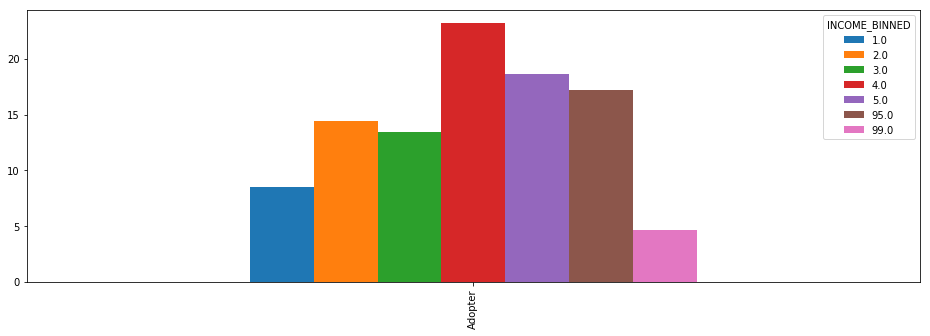

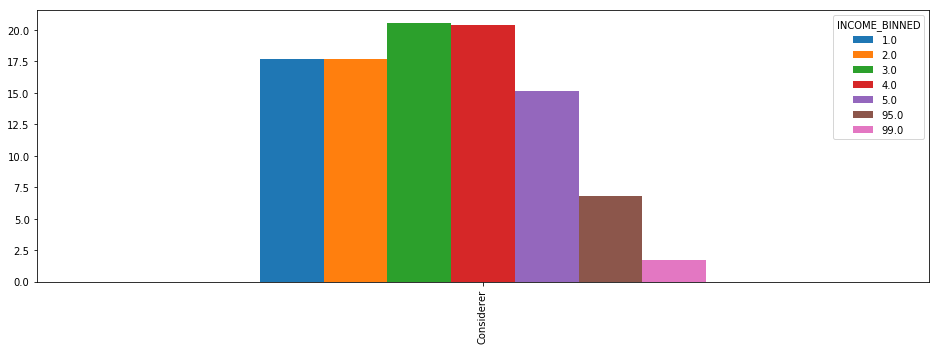

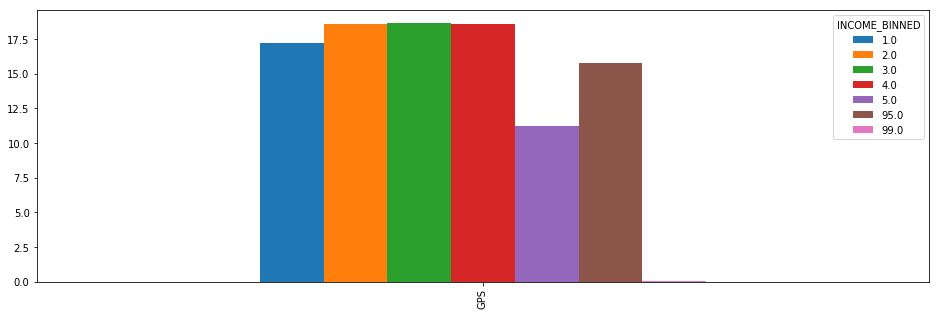

In [50]:
#and even more so in the gps (not considering) group.
all_income = pd.DataFrame()
all_income.append([a_counts, c_counts, g_counts]).groupby(level=0).plot(kind='bar')

In [51]:
#make all dataset's features categorical
g_comparable_cat = g_comparable[g_comparable.columns].astype('category')
g_comparable_cat.set_index('CASE_ID')
g_comparable['CASE_ID'].rename('ID') #not changing the column name?
g_comparable_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
count,1341,1341,1341,1341,1230.0,1228.0,1341,1341,1341,1341,...,1341,1341,1317.0,1341,1341,1339.0,1341,1341,1341,1341
unique,1341,1,1,4,11.0,11.0,6,6,6,6,...,4,8,2.0,3,3,4.0,4,5,7,2
top,1341,1,1,3,5.0,5.0,4,4,4,4,...,2,3,0.0,0,1,4.0,2,1,3,0
freq,1,1341,1341,351,297.0,254.0,504,555,673,466,...,423,437,853.0,1034,795,376.0,456,614,250,857


In [52]:
#adding in a target column, and populating the adopters with '1' (rest are left empty)
g_comparable_cat['Purchased'] = ''
g_comparable_cat.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
0,1,1,1,1,6.0,4.0,3,3,3,4,...,2,0.0,0,0,4.0,4,2,3,1,
1,2,1,1,4,7.0,8.0,5,5,3,5,...,2,0.0,0,1,3.0,4,2,4,0,
2,3,1,1,2,5.0,5.0,3,3,4,4,...,4,0.0,0,0,4.0,1,1,95,1,
3,4,1,1,4,3.0,2.0,3,3,3,4,...,4,0.0,0,0,4.0,2,1,4,1,
4,5,1,1,4,4.0,3.0,4,4,4,4,...,97,0.0,0,0,4.0,1,2,3,1,


In [53]:
#g_comparable_cat.describe().T

In [54]:
a_comparable_cat = a_comparable[g_comparable.columns].astype('category')
a_comparable_cat.set_index('CASE_ID')
a_comparable['CASE_ID'].rename('ID')
a_comparable_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
count,1604,1604,1604,1604,1604.0,1604.0,1604,1604,1604,1604,...,1604.0,1604,1604.0,1604.0,1604.0,1604.0,1455.0,1604,1550.0,1604
unique,1604,1,2,4,12.0,12.0,7,7,7,7,...,5.0,8,2.0,3.0,3.0,4.0,5.0,5,7.0,3
top,2945,3,2,4,5.0,11.0,5,5,4,5,...,2.0,3,0.0,0.0,0.0,3.0,2.0,1,4.0,0
freq,1,1604,1529,1176,312.0,285.0,543,505,657,672,...,537.0,494,811.0,1030.0,1018.0,497.0,502.0,835,359.0,996


In [55]:
#adding in a target column, and populating the adopters with '1' (rest are left empty)
a_comparable_cat['Purchased'] = 1
a_comparable_cat.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
0,1342,3,2,4,4.000000,9.000000,4,4,4,5,...,2,1.0,0.0,0.0,4.0,4.0,2,5.0,1,1
1,1343,3,2,4,7.000000,11.000000,4,4,5,4,...,5,0.0,0.0,0.0,4.0,2.0,1,4.0,0,1
2,1344,3,2,4,6.201224,7.469136,4,4,3,4,...,90,0.0,99.0,99.0,4.0,99.0,99,99.0,99,1
3,1345,3,2,4,11.000000,11.000000,1,1,1,3,...,5,1.0,1.0,0.0,2.0,2.0,2,3.0,0,1
4,1346,3,2,4,5.000000,7.000000,5,3,4,3,...,3,1.0,0.0,1.0,2.0,2.0,2,1.0,0,1


In [56]:
c_comparable_cat = c_comparable[c_comparable.columns].astype('category')
c_comparable_cat.set_index('CASE_ID')
c_comparable['CASE_ID'].rename('ID')
c_comparable_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
count,588,588,588,588,573.0,575.0,588,587.0,588,587.0,...,536.0,588,574.0,588,588,578.0,588,588,588,588
unique,588,1,2,4,11.0,11.0,6,6.0,6,6.0,...,4.0,8,2.0,3,3,4.0,4,5,7,3
top,3533,2,5,4,5.0,5.0,4,4.0,4,5.0,...,1.0,3,1.0,0,0,1.0,4,1,3,0
freq,1,588,436,187,145.0,96.0,200,200.0,233,249.0,...,172.0,183,321.0,317,323,272.0,178,284,121,468


In [57]:
#adding in a target column, and populating the adopters with '1' (rest are left empty)
c_comparable_cat['Purchased'] = ''
c_comparable_cat.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED,Purchased
0,2946,2,4,2,5.0,6.0,3,3.0,2,4.0,...,97,1.0,1,1,1.0,3,3,4,0,
1,2947,2,4,3,6.0,11.0,3,3.0,3,1.0,...,4,1.0,1,0,2.0,2,1,4,0,
2,2948,2,4,4,6.0,7.0,5,5.0,3,5.0,...,1,1.0,0,1,4.0,4,1,3,0,
3,2949,2,4,4,5.0,5.0,2,2.0,2,2.0,...,3,1.0,0,0,3.0,1,2,4,1,
4,2950,2,4,2,9.0,5.0,4,4.0,3,4.0,...,4,0.0,0,0,4.0,3,1,2,1,


In [58]:
#Combine all datasets together
combined = pd.concat([a_comparable, c_comparable, g_comparable], sort=False)

In [59]:
combined.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
0,1342,3,2,4,4.000000,9.000000,4,4.0,4,5.0,...,1.000000,2,1.0,0.0,0.0,4.0,4.0,2,5.0,1
1,1343,3,2,4,7.000000,11.000000,4,4.0,5,4.0,...,2.000000,5,0.0,0.0,0.0,4.0,2.0,1,4.0,0
2,1344,3,2,4,6.201224,7.469136,4,4.0,3,4.0,...,4.000000,90,0.0,99.0,99.0,4.0,99.0,99,99.0,99
3,1345,3,2,4,11.000000,11.000000,1,1.0,1,3.0,...,2.462079,5,1.0,1.0,0.0,2.0,2.0,2,3.0,0
4,1346,3,2,4,5.000000,7.000000,5,3.0,4,3.0,...,4.000000,3,1.0,0.0,1.0,2.0,2.0,2,1.0,0


In [60]:
combined_cat = combined[combined.columns].astype('category')
combined_cat.set_index('CASE_ID')
combined_cat['CASE_ID'].rename('ID')
combined_cat.describe()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
count,3533,3533,3533,3533,3407.0,3407.0,3533,3532.0,3533,3532.0,...,3481.0,3533,3495.0,3533.0,3533.0,3521.0,3384.0,3533,3479.0,3533
unique,3533,3,5,4,12.0,12.0,7,7.0,7,7.0,...,5.0,8,2.0,3.0,4.0,4.0,5.0,5,7.0,3
top,3533,3,2,4,5.0,5.0,4,4.0,4,5.0,...,2.0,3,0.0,0.0,0.0,4.0,2.0,1,4.0,0
freq,1,1604,1529,1701,754.0,553.0,1244,1243.0,1563,1349.0,...,1105.0,1114,1917.0,2381.0,1876.0,962.0,1130.0,1733,728.0,2321


In [61]:
combined_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3533 entries, 0 to 1340
Data columns (total 48 columns):
CASE_ID               3533 non-null category
GPS_NAC_ADOPTER       3533 non-null category
SURVEY_SOURCE         3533 non-null category
STATE                 3533 non-null category
WINTER_NOPV_BINNED    3407 non-null category
SUMMER_NOPV_BINNED    3407 non-null category
PN1                   3533 non-null category
PN2                   3532 non-null category
PN3                   3533 non-null category
E2                    3532 non-null category
BB1                   3533 non-null category
BB2                   3532 non-null category
BB3                   3533 non-null category
BTE8                  3533 non-null category
BE13                  3533 non-null category
BE10                  3532 non-null category
Co3                   3533 non-null category
VB1                   3533 non-null category
VB2                   3533 non-null category
VB3                   3533 non-null ca

In [62]:
#g_comparable_cat.describe().T

"\nfor i in combined_cat.columns:\n    sns.set(style='darkgrid')\n    sns.barplot(combined_cat[i].value_counts().index, combined_cat[i].value_counts().values, alpha=0.9) \n    plt.ylabel('Number of Occurances')\n    plt.xlabel(i)\n    plt.show()\n    "

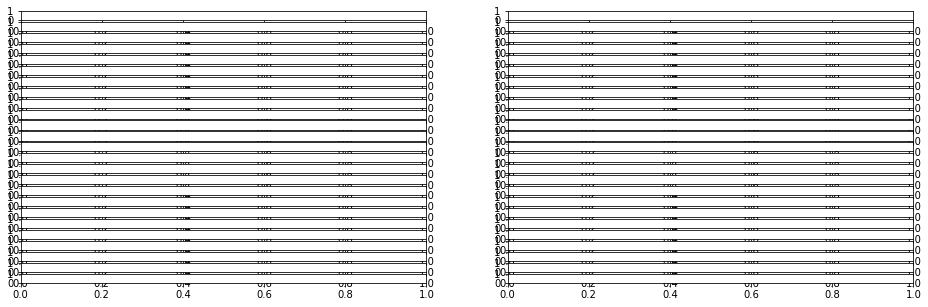

In [63]:
names = [combined_cat.columns]
plt.subplots(25,2)
"""
for i in combined_cat.columns:
    sns.set(style='darkgrid')
    sns.barplot(combined_cat[i].value_counts().index, combined_cat[i].value_counts().values, alpha=0.9) 
    plt.ylabel('Number of Occurances')
    plt.xlabel(i)
    plt.show()
    """

In [64]:
#statistical analysis
#think of algs to test with
combined_cat.columns

Index(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3', 'E2',
       'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1', 'VB2', 'VB3',
       'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1', 'VE2', 'VE4', 'VO1',
       'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3', 'CNS1', 'CNS2', 'CNS4',
       'SQFT_BINNED', 'STANCE', 'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER',
       'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED'],
      dtype='object')

In [65]:
#chi sq-select possible features

In [66]:
#pearsons correlation-???

"\nfor i in a_comparable.columns:\n    sns.set(style='darkgrid')\n    sns.barplot(a_comparable[i].value_counts().index, a_comparable[i].value_counts().values, alpha=0.9) \n    plt.ylabel('Number of Occurances')\n    plt.xlabel(i)\n    plt.show()\n    "

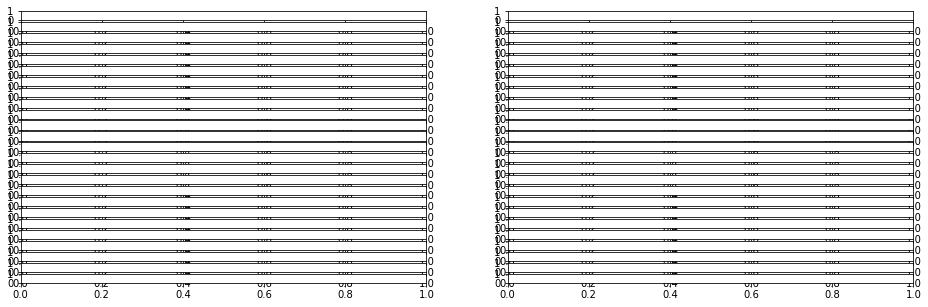

In [67]:
names = [a_comparable.columns]
plt.subplots(25,2)
"""
for i in a_comparable.columns:
    sns.set(style='darkgrid')
    sns.barplot(a_comparable[i].value_counts().index, a_comparable[i].value_counts().values, alpha=0.9) 
    plt.ylabel('Number of Occurances')
    plt.xlabel(i)
    plt.show()
    """

"\nfor i in g_comparable.columns:\n    sns.set(style='darkgrid')\n    sns.barplot(g_comparable[i].value_counts().index, g_comparable[i].value_counts().values, alpha=0.9) \n    plt.ylabel('Number of Occurances')\n    plt.xlabel(i)\n    plt.show()\n    "

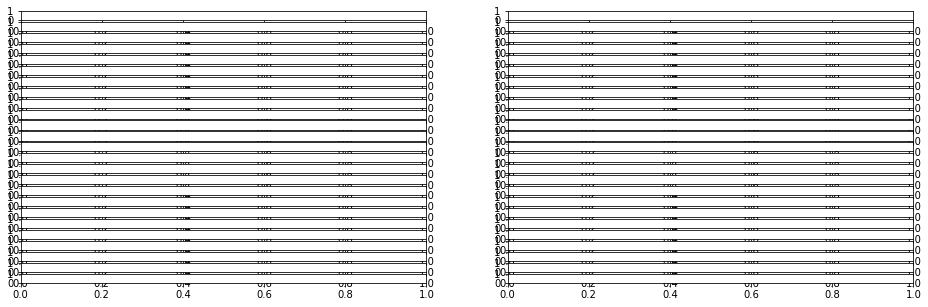

In [68]:
names = [g_comparable.columns]
plt.subplots(25,2)
"""
for i in g_comparable.columns:
    sns.set(style='darkgrid')
    sns.barplot(g_comparable[i].value_counts().index, g_comparable[i].value_counts().values, alpha=0.9) 
    plt.ylabel('Number of Occurances')
    plt.xlabel(i)
    plt.show()
    """

In [69]:
#gender in group A
a_gender = pd.value_counts(a_comparable['GENDER'].values)
a_gender

0.0     1018
1.0      553
99.0      33
dtype: int64

In [70]:
#gender in group G
g_gender = pd.value_counts(g_comparable['GENDER'].values)
g_gender

1     795
0     535
95     11
dtype: int64

In [71]:
observed = g_gender
expected = a_gender/len(a_comparable) * len(g_comparable)
chi_sq_stat = (((observed - expected)**2)/expected).sum()
print(chi_sq_stat)

356.7684186005771


In [72]:
crit = stats.chi2.ppf(q=0.95, df=1)
print(crit)
p_val = 1- stats.chi2.cdf(x=chi_sq_stat, df=1)
print(p_val)

3.841458820694124
0.0


####  Spearman Correlation

In [87]:
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

In [90]:
#g_comparable.loc[a_comparable['PURCHASED']] = 0
a_comparable.head()

,CASE_ID,GPS_NAC_ADOPTER,SURVEY_SOURCE,STATE,WINTER_NOPV_BINNED,SUMMER_NOPV_BINNED,PN1,PN2,PN3,E2,...,SQFT_BINNED,STANCE,PEOPLE_TOT_3PLUS,HAVE_KIDS,GENDER,AGE_BINNED,EDUC_BINNED,FINANCIAL,INCOME_BINNED,RETIRED
0,1342,3,2,4,4.000000,9.000000,4,4,4,5,...,1.000000,2,1.0,0.0,0.0,4.0,4.0,2,5.0,1
1,1343,3,2,4,7.000000,11.000000,4,4,5,4,...,2.000000,5,0.0,0.0,0.0,4.0,2.0,1,4.0,0
2,1344,3,2,4,6.201224,7.469136,4,4,3,4,...,4.000000,90,0.0,99.0,99.0,4.0,99.0,99,99.0,99
3,1345,3,2,4,11.000000,11.000000,1,1,1,3,...,2.462079,5,1.0,1.0,0.0,2.0,2.0,2,3.0,0
4,1346,3,2,4,5.000000,7.000000,5,3,4,3,...,4.000000,3,1.0,0.0,1.0,2.0,2.0,2,1.0,0


In [91]:
feat = a_comparable['INCOME_BINNED']
target = a_comparable['PURCHASED']
spearmanr_coeficient, p_value = spearmanr(feat, target)

KeyError: 'PURCHASED'

In [ ]:
#not sure why this is still not working.  Some issue with the Purchased feature, but for a group,
#this should be filled in with '1'


In [92]:
combined_cat.columns

Index(['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3', 'E2',
       'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1', 'VB2', 'VB3',
       'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1', 'VE2', 'VE4', 'VO1',
       'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3', 'CNS1', 'CNS2', 'CNS4',
       'SQFT_BINNED', 'STANCE', 'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER',
       'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED'],
      dtype='object')

In [93]:
from scipy.stats import chi2_contingency

In [94]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None
        self.chi2 = None
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha, chi2, p):
        result = ""
        if self.p < alpha:
            result = "{0} is IMPORTANT: chi: {1}, p:{2}".format(colX, chi2, p)
        else:
            result = "{0} is NOT an important predictor: chi:{1}, p:{2} (Discard {0} from model)".format(colX, chi2, p)
        print(result)
    
    def TestIndependence(self, colX, colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(X,Y)
        chi2, p, dof, expected = chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index=self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha, chi2, p)



In [95]:
combined_cat['dummy_feat'] = 0 #want to test Spearman importance with this dummy feat

cT = ChiSquare(combined_cat)
testColumns = ['CASE_ID', 'GPS_NAC_ADOPTER', 'SURVEY_SOURCE', 'STATE', 'HOME',
       'WINTER_NOPV_BINNED', 'SUMMER_NOPV_BINNED', 'PN1', 'PN2', 'PN3', 'E2',
       'BB1', 'BB2', 'BB3', 'BTE8', 'BE13', 'BE10', 'Co3', 'VB1', 'VB2', 'VB3',
       'VA1', 'VA2', 'VA3', 'VT1', 'VT2', 'VT3', 'VE1', 'VE2', 'VE4', 'VO1',
       'VO2', 'VO3', 'CIJM1', 'CIJM2', 'CIJM3', 'CNS1', 'CNS2', 'CNS4',
       'SQFT_BINNED', 'STANCE', 'PEOPLE_TOT_3PLUS', 'HAVE_KIDS', 'GENDER',
       'AGE_BINNED', 'EDUC_BINNED', 'FINANCIAL', 'INCOME_BINNED', 'RETIRED', 'dummy_feat']
for  var in testColumns:
    cT.TestIndependence(colX=var, colY='PURCHASED')

KeyError: 'PURCHASED'

In [ ]:
#everything is important?!? Let's try another chi-sq test:

table = pd.crosstab( combined_cat['PURCHASED'], combined_cat['BE10'])
chi2, p, dof, expected = chi2_contingency(table.values)
#print('Chi-square statistics %0.9f p_value %0.3f' % (chi2, p))
print('Chi-square statistics {0} p_value {1}'.format(chi2, p))

In [ ]:
#why am I getting different chi-sq and p-values for income from the two different
#calculations?  Something is not right-I don't think this second test is working: 
#all features calc the same results: chi=0, p=1.0

#boxplot to see income to purchased relationship:
combined_cat.boxplot('PURCHASED', 'INCOME_BINNED')

In [2]:
#since purchased is not fully populated (nulls for c and g), this is not showing me what I want
#maybe a histogram of adopters and combined on income, to see if there is a shift, and if so
#maybe run a confidence interval/mean-shift to see if it is significant? what would that tell me?
#just b/c purchased is null does NOT mean they are not potential buyers, so I am not really looking
#for a shift, but rather indicators (features similar/different) in c and g groups that have 
#similar pattern to adopters...how to find this out?